In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math

In [2]:
dataset = np.load("../data/formatted/dataset.npy", allow_pickle=True)

In [3]:
#Extract all styles
styles = []
for element in dataset:
    styles.append(element[1])
    
print("Number of styles: ", (set(styles)))

Number of styles:  {'Slow Ballad', 'Blues', 'Musical', 'Samba', 'Country Ballad', 'Maxixe', 'Forró', 'Funk', 'Slowly', 'Bolero-Cha', 'Montuno', 'Baião', 'Up Tempo', 'Salsa', 'Up Waltz (One Feel)', 'Calypso', 'Disco', 'Medium Ballad', 'Tango', 'Gypsy Waltz', 'Even 8ths', 'Med Up Latin', 'Dreamlike', 'Gary Aprile', 'Latin', 'Afro', 'Pop', 'Choro', 'Jazz', 'Hymn', 'Merengue', 'Power Ballad', 'Ballad', 'Bossa', '128 Feel', 'Gospel', 'Waltz', 'Shuffle', 'Medium Shuffle', 'Reggae', 'RnB', 'Folk', 'Son', 'Moderate Latin', 'Medium Waltz', 'Foxtrot', 'Mambo', 'Medium Slow', 'Cha Cha', 'Marchinha', 'March', 'Gospel Ballad', 'Frevo', 'Slow Shuffle', 'Chacarera', 'Medium Up', 'Medium Country', 'Bolero', 'Even 16ths', 'Soul', 'Afoxé', 'Rock'}


In [4]:
styleCount = {}
for style in styles:   
    styleCount[style] = styleCount.get(style, 0) + 1

styleCount = sorted(styleCount.items(), key = lambda kv: -kv[1])
styleCount = np.array(styleCount, dtype=object)

In [5]:
print("Style count: ", styleCount)

Style count:  [['Jazz' 18576]
 ['Samba' 7740]
 ['Ballad' 5220]
 ['Rock' 3660]
 ['Bossa' 2244]
 ['Pop' 1908]
 ['Waltz' 1872]
 ['Funk' 1020]
 ['Blues' 876]
 ['Latin' 864]
 ['Even 8ths' 756]
 ['Gospel' 708]
 ['Soul' 492]
 ['Bolero' 276]
 ['RnB' 180]
 ['Afoxé' 180]
 ['Folk' 132]
 ['Disco' 96]
 ['Tango' 96]
 ['Gypsy Waltz' 96]
 ['Afro' 84]
 ['Baião' 84]
 ['Son' 72]
 ['Shuffle' 60]
 ['Reggae' 60]
 ['Hymn' 48]
 ['Choro' 48]
 ['Medium Shuffle' 48]
 ['Bolero-Cha' 36]
 ['Marchinha' 36]
 ['Country Ballad' 36]
 ['Medium Ballad' 36]
 ['Medium Waltz' 24]
 ['Medium Slow' 24]
 ['March' 24]
 ['Slow Ballad' 24]
 ['Montuno' 24]
 ['Salsa' 24]
 ['Medium Country' 12]
 ['Foxtrot' 12]
 ['Med Up Latin' 12]
 ['Merengue' 12]
 ['Cha Cha' 12]
 ['Slow Shuffle' 12]
 ['Frevo' 12]
 ['Slowly' 12]
 ['Chacarera' 12]
 ['128 Feel' 12]
 ['Calypso' 12]
 ['Up Tempo' 12]
 ['Dreamlike' 12]
 ['Mambo' 12]
 ['Gary Aprile' 12]
 ['Musical' 12]
 ['Power Ballad' 12]
 ['Medium Up' 12]
 ['Gospel Ballad' 12]
 ['Up Waltz (One Feel)' 12]
 

/tmp/ipykernel_544835/1708766953.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.barplot(x=key, y=value, palette="rainbow")
/tmp/ipykernel_544835/1708766953.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(b.get_xticklabels(), rotation=45, horizontalalignment='right')


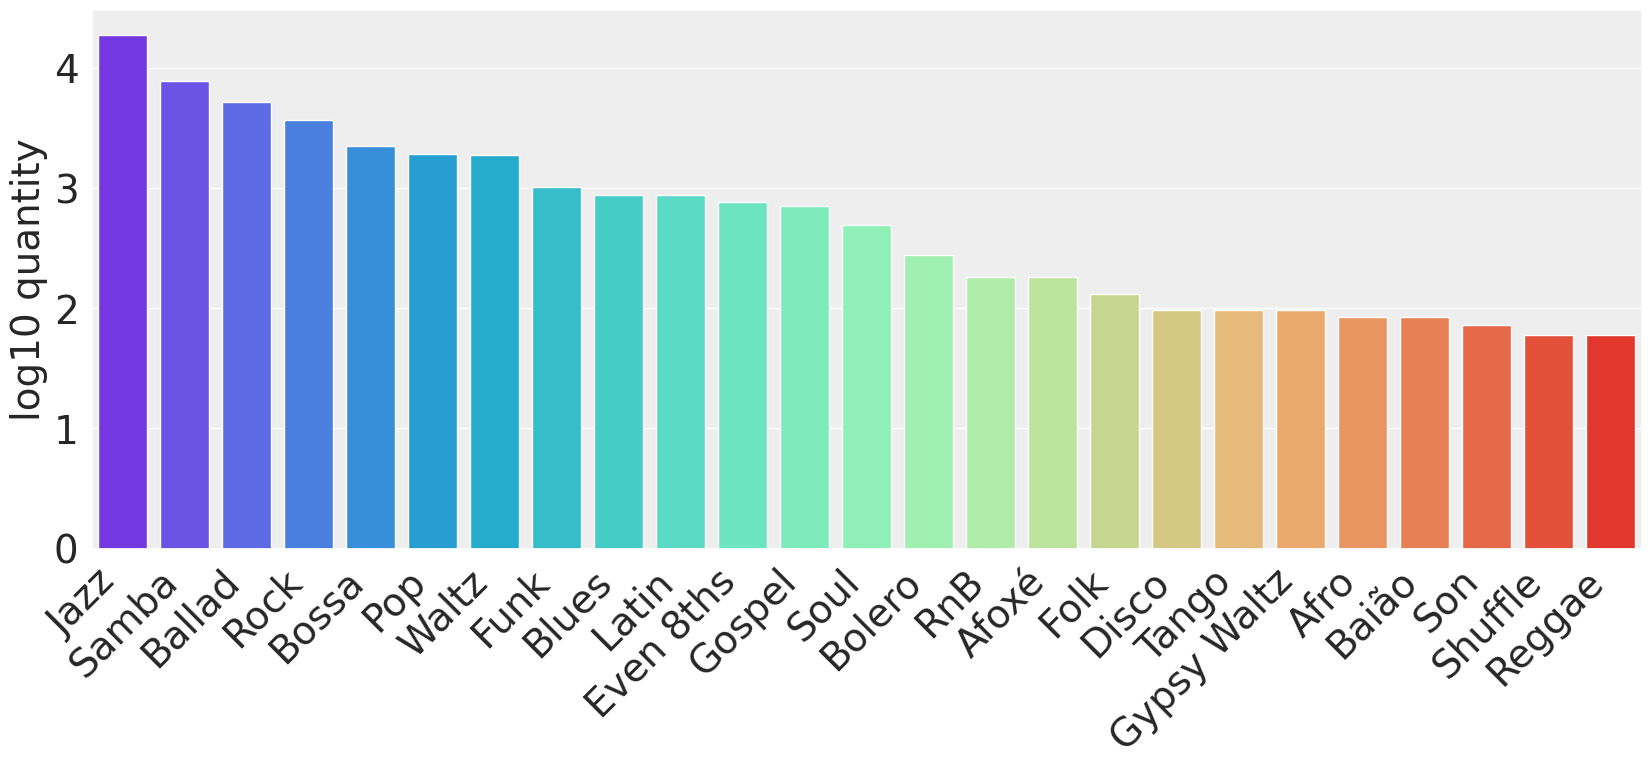

In [6]:
result = []
for i in range(25):
    result.append(styleCount[i])
    
sns.set(rc={'figure.figsize':(20,7)})
sns.set(font_scale=0.8)
sns.set(rc={'axes.facecolor':'#eee', 'figure.facecolor':'white'})

styleCount = np.array(styleCount, dtype=object)
    
key = []
value = []
for element in result:
    val = math.log10(element[1])
    value.append(val)
    key.append(element[0])
    
b = sns.barplot(x=key, y=value, palette="rainbow") 
b.axes.set_title("",fontsize=16)
b.set_xlabel("",fontsize=16)
b.set_xticklabels(b.get_xticklabels(), rotation=45, horizontalalignment='right')
b.set_ylabel("log10 quantity",fontsize=28)
b.tick_params(labelsize=28)
plt.show()


In [7]:
# Sum values for genres after the 13th entry and replace them with "Other"
styleCount = styleCount.tolist()
other_sum = sum(value for genre, value in styleCount[13:])
reduced_genres_counts = styleCount[:13] + [['Other', other_sum]]

print(reduced_genres_counts)


[['Jazz', 18576], ['Samba', 7740], ['Ballad', 5220], ['Rock', 3660], ['Bossa', 2244], ['Pop', 1908], ['Waltz', 1872], ['Funk', 1020], ['Blues', 876], ['Latin', 864], ['Even 8ths', 756], ['Gospel', 708], ['Soul', 492], ['Other', 2136]]


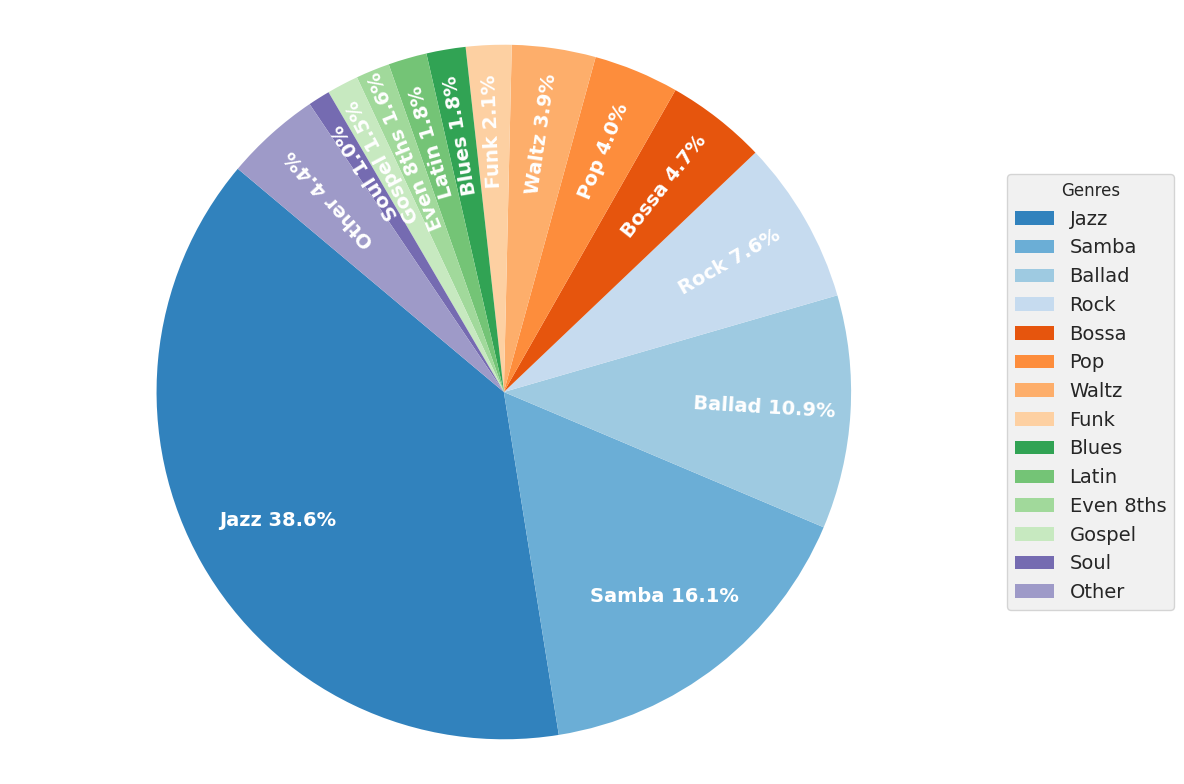

In [14]:
import matplotlib.pyplot as plt

sizes = [count for _, count in reduced_genres_counts]
labels = [genre for genre, _ in reduced_genres_counts]
total = sum(sizes)
colors = plt.cm.tab20c(np.arange(len(sizes)))

fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts, autotexts = ax.pie(sizes, startangle=140, colors=colors, autopct='', pctdistance=0.75, textprops={'fontsize': 12}, wedgeprops={"edgecolor": "k",'linewidth': 0, 'antialiased': True})

for i, (wedge, autotext) in enumerate(zip(wedges, autotexts)):
    percentage = 100.0 * sizes[i] / total
    autotext.set_text(f'{labels[i]} {percentage:.1f}%')
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')
    if i >= 2:  # Adjust rotation starting from the 8th label
        rot = (wedge.theta2 - wedge.theta1) / 2 + wedge.theta1
        autotext.set_rotation(rot)

plt.legend(labels, title="Genres", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


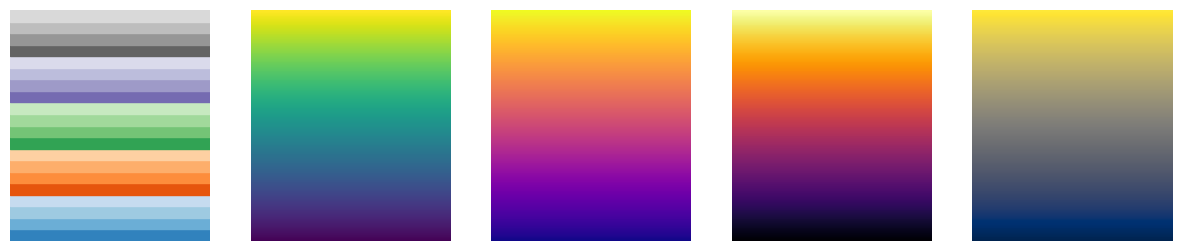

In [9]:
import matplotlib.pyplot as plt

# New palette options

# Palette 1: Original (plt.cm.tab20c.colors)
palette_1 = plt.cm.tab20c.colors

# Palette 2: Viridis
palette_2 = plt.cm.viridis.colors

# Palette 3: Plasma
palette_3 = plt.cm.plasma.colors

# Palette 4: Inferno
palette_4 = plt.cm.inferno.colors

# Palette 5: Cividis
palette_5 = plt.cm.cividis.colors

# Display palettes
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for ax, palette in zip(axs, [palette_1, palette_2, palette_3, palette_4, palette_5]):
    for i in range(len(palette)):
        ax.add_patch(plt.Rectangle((0, i), 1, 1, color=palette[i]))
    ax.set_xlim(0, 1)
    ax.set_ylim(0, len(palette))
    ax.axis('off')
plt.show()
